In [101]:
# import libraries

# Data manipulation
import numpy as np
import pandas as pd
# from datetime import datetime

# Data visualisation
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [6]:
synthetic = pd.read_csv("../data/Updated_Synethetic_Data.csv")
synthetic.head()

,Contact Id,Gender,Postal Code,Purchase Time,Mall Id,Store Id,Store Name,Category,Amount,Age
0,2561,M,4191,2019-03-27,7,20296,Cotton On,Fashion Wear & Accessories,211,56
1,8186,F,8030,2019-01-20,7,22476,Xing Hua Lou,Food & Restaurants,140,37
2,2193,F,4076,2019-06-06,7,21564,Shine,"Leather Goods, Bags & Shoes",186,32
3,2561,F,6054,2019-05-05,7,22442,Venus Beauty,Hair & Beauty,155,46
4,6228,F,1480,2019-04-21,7,23095,Wadori Yakitori,Food & Restaurants,32,38


In [13]:
synthetic['Purchase Time'] = pd.to_datetime(synthetic['Purchase Time'], format='%Y-%m-%d')

In [15]:
synthetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397638 entries, 0 to 397637
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Contact Id     397638 non-null  int64         
 1   Gender         397638 non-null  object        
 2   Postal Code    397638 non-null  int64         
 3   Purchase Time  397638 non-null  datetime64[ns]
 4   Mall Id        397638 non-null  int64         
 5   Store Id       397638 non-null  int64         
 6   Store Name     397638 non-null  object        
 7   Category       397638 non-null  object        
 8   Amount         397638 non-null  int64         
 9   Age            397638 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 30.3+ MB


In [145]:
# no duplicates
synthetic.drop_duplicates().shape

(397638, 11)

In [16]:
synthetic['Gender'].unique()

array(['M', 'F', '0'], dtype=object)

In [21]:
synthetic.nunique()

Contact Id       8863
Gender              3
Postal Code      9000
Purchase Time     177
Mall Id             1
Store Id          153
Store Name        162
Category           17
Amount            290
Age                41
dtype: int64

## Time Series Analysis

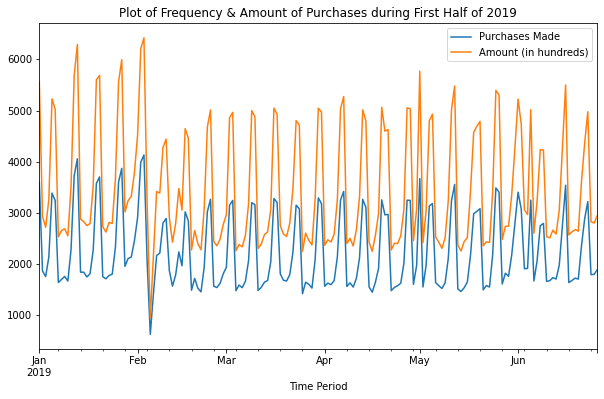

In [66]:
# frequency of purchases
gb_time = pd.DataFrame(synthetic.groupby('Purchase Time').size()).rename(columns={0:'Purchases Made'})

# purchase amounts
amt = synthetic.groupby('Purchase Time')['Amount'].sum()/100
gb_time['Amount'] = amt
gb_time = gb_time.rename(columns={'Amount':'Amount (in hundreds)'})
gb_time.reset_index(inplace=True)

# line graphs of both frequency and purchase amounts 
gb_time.plot(x='Purchase Time', y=['Purchases Made', 'Amount (in hundreds)'], figsize=(10,6))
plt.title("Plot of Frequency & Amount of Purchases during First Half of 2019")
plt.xlabel("Time Period");

### Some Observations
- High purchase traffic particularly in the beginning of the year/ January
- Peak sales at the start of February, which dips almost immediately after
- Highest sales and traffic on 3rd Feb. In 2019, CNY falls on 5th and 6th Feb. 3rd Feb is the Sunday right before CNY
- Lowest sales and traffic on 5th Feb. 1st day of CNY, stores closed, low store visits

## Demographics 

In [71]:
synthetic.Age.describe()

count    397638.000000
mean         44.977495
std          11.827316
min          25.000000
25%          35.000000
50%          45.000000
75%          55.000000
max          65.000000
Name: Age, dtype: float64

In [74]:
def age_group(age):
    if (age >= 20) & (age < 30):
        return '20s'
    elif (age >= 30) & (age < 40):
        return '30s'
    elif (age >=40) & (age < 50):
        return '40s'
    elif (age >= 50) & (age < 60):
        return '50s'
    else:
        return '60s'
    
synthetic['Age Group'] = synthetic['Age'].apply(age_group)
synthetic.head()

,Contact Id,Gender,Postal Code,Purchase Time,Mall Id,Store Id,Store Name,Category,Amount,Age,Age Group
0,2561,M,4191,2019-03-27,7,20296,Cotton On,Fashion Wear & Accessories,211,56,50s
1,8186,F,8030,2019-01-20,7,22476,Xing Hua Lou,Food & Restaurants,140,37,30s
2,2193,F,4076,2019-06-06,7,21564,Shine,"Leather Goods, Bags & Shoes",186,32,30s
3,2561,F,6054,2019-05-05,7,22442,Venus Beauty,Hair & Beauty,155,46,40s
4,6228,F,1480,2019-04-21,7,23095,Wadori Yakitori,Food & Restaurants,32,38,30s


In [88]:
synthetic.groupby(['Age Group', 'Gender']).size()

Age Group  Gender
20s        F         36165
           M         12421
30s        0             1
           F         72383
           M         24952
40s        F         72229
           M         24599
50s        F         72096
           M         24934
60s        0             1
           F         43148
           M         14709
dtype: int64

In [93]:
temp = synthetic.groupby(['Age Group', 'Gender']).agg({
    'Amount': 'sum'
}).reset_index().rename(columns={'Amount':'Total Amount'})
# didn't get much difference between groups or any significant trend with average amount per group

temp['Total Amount'] = temp['Total Amount']/100000
table = pd.pivot_table(temp, values='Total Amount', index='Age Group', columns='Gender')
table

Gender,0,F,M
Age Group,,,
20s,NaN,55.96164,19.28453
30s,0.00291,111.79865,38.59679
40s,NaN,111.38268,38.06646
50s,NaN,111.82895,38.50767
60s,0.00029,66.49615,22.64647


In [115]:
synthetic[synthetic['Gender'] == '0']

,Contact Id,Gender,Postal Code,Purchase Time,Mall Id,Store Id,Store Name,Category,Amount,Age,Age Group
70816,3227,0,3700,2019-04-13,7,22878,G2000,Fashion Wear & Accessories,291,34,30s
210664,3227,0,9754,2019-04-13,7,22859,Uniqlo,Fashion Wear & Accessories,29,65,60s


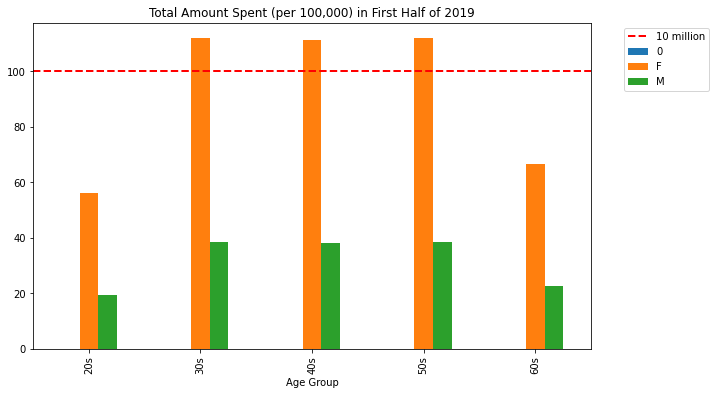

In [116]:
table.plot(kind='bar', figsize=(10,6))
plt.axhline(y=100, linewidth=2, linestyle='--', color='r', label='10 million')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Total Amount Spent (per 100,000) in First Half of 2019")
plt.xlabel("Age Group");

### Some Observations
- Amount spent by Gender '0' is very, very small compared to the rest because it's just 1 person in 30s, 1 in 60s
- Drop the 2 rows of Gender '0' maybe?
- Across all age groups, Females tend to spend much more than Males, more than twice
- 3 groups which exceeded a spend of >10mil: Females in 30s, 40s, and 50s

## Category/Type of Purchases

In [117]:
synthetic.head()

,Contact Id,Gender,Postal Code,Purchase Time,Mall Id,Store Id,Store Name,Category,Amount,Age,Age Group
0,2561,M,4191,2019-03-27,7,20296,Cotton On,Fashion Wear & Accessories,211,56,50s
1,8186,F,8030,2019-01-20,7,22476,Xing Hua Lou,Food & Restaurants,140,37,30s
2,2193,F,4076,2019-06-06,7,21564,Shine,"Leather Goods, Bags & Shoes",186,32,30s
3,2561,F,6054,2019-05-05,7,22442,Venus Beauty,Hair & Beauty,155,46,40s
4,6228,F,1480,2019-04-21,7,23095,Wadori Yakitori,Food & Restaurants,32,38,30s


Some Store Names have same Store Id
- eg. 22875: Innisfree and Clinique (skincare/makeup stores), 22663: TianPo and Lee Hua Jewellery (jewelry stores)

In [160]:
store_cat = synthetic[['Store Name', 'Category']].drop_duplicates(keep='first')

cat_dict = {}
for i in range(len(store_cat)):
    cat = store_cat.iloc[i]['Category']
    if cat not in cat_dict.keys():
        cat_dict[cat] = []
    cat_dict[cat].append(store_cat.iloc[i]['Store Name'])
cat_dict    

{'Fashion Wear & Accessories': ['Cotton On',
  'Hush Puppies Apparel',
  'Uniqlo',
  'VIVO',
  'JW Fashion',
  'Giordano',
  'Bossini',
  'G2000',
  'Pierre Cardin',
  "Levi's",
  'Converse',
  'Citrusox',
  'Lush Addiction',
  'Purpur',
  'XCraft',
  'Cotton On Body',
  'Lovisa',
  'Peniwern'],
 'Food & Restaurants': ['Xing Hua Lou',
  'Wadori Yakitori',
  'Chateraise',
  'Bengawan Solo',
  'Lao Huo Tang Restaurants',
  'Ichiban Boshi',
  'Wok Hey',
  "Swensen's",
  'BreadTalk / Toastbox',
  'Bali Thai',
  'Hot Tomato',
  'Siamese Cat',
  'Daessiksin Korean BBQ Buffet',
  'Crystal Jade Hong Kong Kitchen',
  'Subway',
  'Old Chang Kee',
  'Texas Chicken',
  'Four Leaves',
  '9PM Kkochi',
  'A-One Claypot House',
  'Yoshinoya',
  'So Pho',
  'Tonkotsu Hototogisu',
  'Pizza Hut',
  'Ajisen Ramen',
  'Crave',
  'Bee Cheng Hiang',
  'Kuriya Japanese Market - Ichiban Bento',
  'AburiEN',
  'Teppan-Yaki',
  'PrimaDeli',
  '4Fingers Crispy Chicken',
  'Pastamania',
  'Hokkaido Baked Cheese Ta

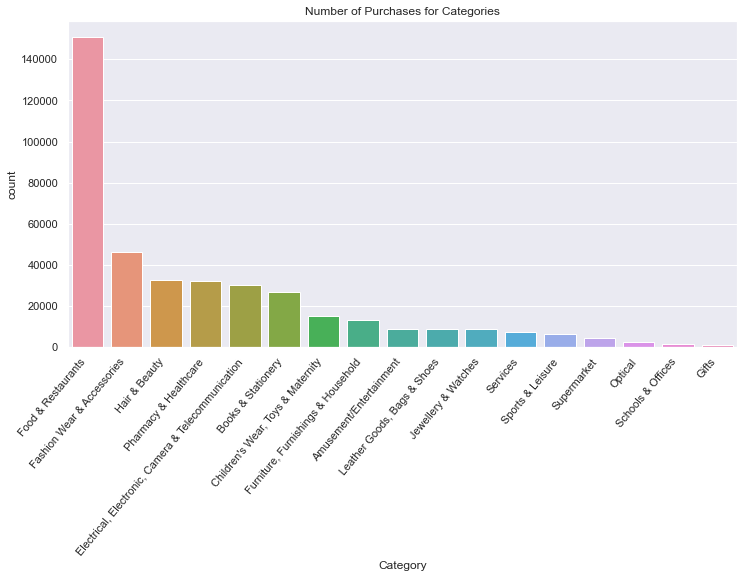

In [202]:
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.countplot(x='Category', data=synthetic, order=synthetic['Category'].value_counts().index)
ax.set_title('Number of Purchases for Categories')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right');

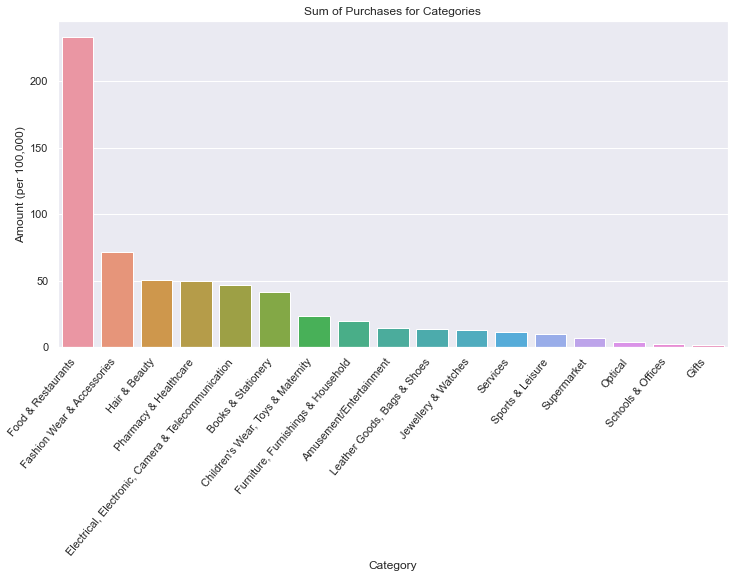

In [200]:
gb_cat = synthetic.groupby('Category')['Amount'].sum()/100000
gb_cat = pd.DataFrame(gb_cat.reset_index()).rename(columns={'Amount':'Amount (per 100,000)'})
gb_cat.sort_values(by='Amount (per 100,000)', ascending=False, inplace=True)

sns.set(rc={'figure.figsize':(12,6)})
ax2 = sns.barplot(x='Category', y='Amount (per 100,000)', data=gb_cat)
ax2.set_title('Sum of Purchases for Categories')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50, ha='right');

### Some Observations
- Both quantity and sum of purchases across store categories share a similar trend 
- Best selling category & Highest Traffic: Food & Restaurants
- Least selling category & Lowest Traffic: Gifts

In [222]:
def top_stores(category, top_n):
    """find top_n best selling stores that fall under category input"""
    transactions = synthetic[synthetic['Category'] == category]
    sales = transactions.groupby('Store Name')['Amount'].sum().sort_values(ascending=False)[:top_n]
    sales = sales.to_frame().reset_index()
    print("Top {} Best Selling Stores:".format(len(sales)))
    return sales

In [223]:
top_stores('Food & Restaurants',3)

Top 3 Best Selling Stores:


,Store Name,Amount
0,Hot Tomato,1727295
1,Ichiban Boshi,1597861
2,Lao Huo Tang Restaurants,1250656


In [224]:
top_stores('Fashion Wear & Accessories',5)

Top 5 Best Selling Stores:


,Store Name,Amount
0,Uniqlo,4406834
1,Giordano,380453
2,JW Fashion,353098
3,G2000,241076
4,Hush Puppies Apparel,224958


In [225]:
top_stores('Gifts',5)

Top 2 Best Selling Stores:


,Store Name,Amount
0,Precious Thots,85773
1,Banana Story,82441


## Segmentation of Contact Ids: RFM Modelling

In [226]:
customer_data = synthetic[["Contact Id", "Purchase Time", "Amount"]]
customer_data.head()

,Contact Id,Purchase Time,Amount
0,2561,2019-03-27,211
1,8186,2019-01-20,140
2,2193,2019-06-06,186
3,2561,2019-05-05,155
4,6228,2019-04-21,32


In [227]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397638 entries, 0 to 397637
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Contact Id     397638 non-null  int64         
 1   Purchase Time  397638 non-null  datetime64[ns]
 2   Amount         397638 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 9.1 MB


In [231]:
refDate = customer_data['Purchase Time'].max() # baseline date for recency, purchases on this date is most recent

# create RFM model dataframe
rfmModel = customer_data.groupby('Contact Id').agg({
    'Purchase Time': lambda x: (refDate-x.max()).days,    
    'Contact Id': lambda x: len(x),
    'Amount': lambda x : x.sum()
})

rfmModel.rename(columns={'Purchase Time':'Recency','Contact Id':'Frequency','Amount':'Monetary'},inplace=True)
rfmModel = rfmModel.reset_index()
rfmModel.head()

,Contact Id,Recency,Frequency,Monetary
0,0,0,56,8632
1,1,12,15,2475
2,2,2,34,5084
3,3,20,25,3822
4,4,0,86,13903


In [241]:
quantiles = rfmModel.quantile(q=[0.2,0.4,0.6,0.8]) # dataframe of quantiles for each column
quantiles = quantiles.to_dict() 
print(quantiles)

{'Contact Id': {0.2: 1774.4, 0.4: 3547.8, 0.6: 5323.2, 0.8: 7102.6}, 'Recency': {0.2: 1.0, 0.4: 3.0, 0.6: 5.0, 0.8: 11.0}, 'Frequency': {0.2: 19.0, 0.4: 31.0, 0.6: 45.0, 0.8: 67.0}, 'Monetary': {0.2: 2868.4, 0.4: 4794.8, 0.6: 6973.0, 0.8: 10337.800000000001}}


In [242]:
rfmModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8863 entries, 0 to 8862
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Contact Id  8863 non-null   int64
 1   Recency     8863 non-null   int64
 2   Frequency   8863 non-null   int64
 3   Monetary    8863 non-null   int64
dtypes: int64(4)
memory usage: 277.1 KB


In [243]:
def rScores(x,p,d): # recency score - the more recent, the higher the score
    """
    x (int): input value
    p (str): column name
    d (dict): quantiles dictionary 
    """
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1
    
def fmScores(x,p,d): # frequency/monetary score - the more frequent/higher spend, the higher the score     
    if x <= d[p][0.2]:  
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5

In [246]:
rfmModel['R'] = rfmModel['Recency'].apply(rScores, args=('Recency',quantiles))
rfmModel['F'] = rfmModel['Frequency'].apply(fmScores, args=('Frequency',quantiles))
rfmModel['M'] = rfmModel['Monetary'].apply(fmScores, args=('Monetary',quantiles))
rfmModel['RFM'] = rfmModel.apply(lambda row: str(row.R) + str(row.F) + str(row.M), axis=1)
rfmModel.head()

,Contact Id,Recency,Frequency,Monetary,R,F,M,RFM
0,0,0,56,8632,5,4,4,544
1,1,12,15,2475,1,1,1,111
2,2,2,34,5084,4,3,3,433
3,3,20,25,3822,1,2,2,122
4,4,0,86,13903,5,5,5,555
